## Оптимизация функций 

### Рассмотрим случай минимизации следущей гладкой функции: 

## $$ f(x) = \sin(\frac{x}{5})\cdot e^{\frac{x}{10}} + 5{e^{\frac{-x}{2}}} $$





In [1]:
import numpy as np
import math as m
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [2]:
def f(x):
    return (np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)) 

#### Построим график этой функции

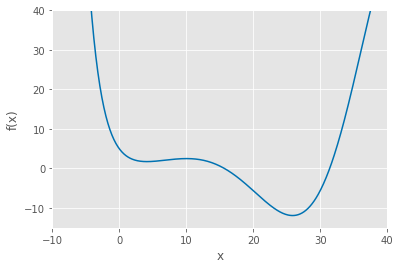

In [875]:
x_min = []
y_min = []
x = np.arange(-10,40,0.1)
'''ax = plt.subplot()
ax.set(xlim = [-10,40],ylim = [-15,40] )'''
plt.style.use('seaborn-colorblind')
plt.axis([-10,40,-15,40])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,f(x))

#### Видим, что функция имеет два локальных минимума. Для их нахождения воспользуемся алгоритмом Бройдена — Флетчера — Гольдфарба — Шанно (BFGS) , а в качестве начальных приближений положим: x=2 и х = 30.

In [876]:
local_opt = opt.minimize(f,2,method = 'BFGS')
print (res)
x_min = np.append(x_min,local_opt.x)
y_min = np.append(y_min,local_opt.fun)

      fun: -11.898894665981313
 hess_inv: array([[ 1.67936744]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([ 25.88019321])


In [877]:
% time local_opt = opt.minimize(f,30,method = 'BFGS')
print ()
x_min = np.append(x_min,local_opt.x)
y_min = np.append(y_min,local_opt.fun)
print (x_min)
print (y_min)

Wall time: 0 ns

[  4.13627628  25.88019321]
[  1.74526829 -11.89889467]


 Получили две разные точки (4.13627628 ; 1.74526829) и (25.88019321,-11.89889467) Так как градиентные методы расчитаны на нахождение локальных минимумов результат ожидаем и корректен. Продемонстрируем это введя данные точки на график функции.

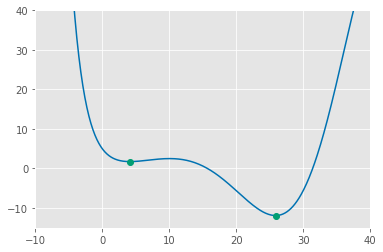

In [878]:
plt.axis([-10,40,-15,40])
plt.plot(x,f(x),x_min,y_min,'o')

### Метод дифференциальной эволюции для поиска глобального минимума функции. 

In [879]:
%time global_opt = opt.differential_evolution(f,[(1,30)])

Wall time: 15.6 ms


In [880]:
global_opt

     fun: array([-11.89889467])
     jac: array([  3.55271368e-06])
 message: 'Optimization terminated successfully.'
    nfev: 66
     nit: 3
 success: True
       x: array([ 25.88019929])

In [881]:
x_min = global_opt.x
y_min = global_opt.fun

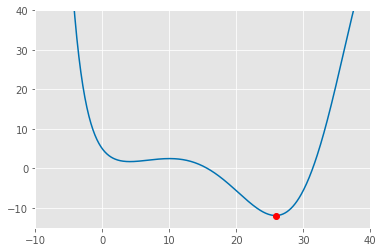

In [882]:
plt.axis([-10,40,-15,40])
plt.plot(x,f(x),x_min,y_min,'or')

### Теперь попробуем решить задачу для негладкой функции:

In [883]:
def h(x):
    return (np.floor(np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)))

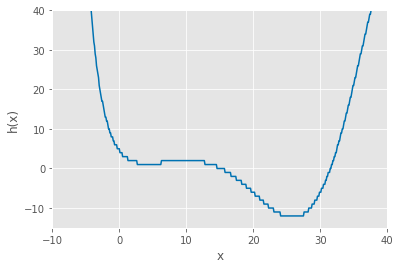

In [884]:
plt.axis([-10,40,-15,40])
plt.ylabel('h(x)')
plt.xlabel('x')
plt.plot(x,h(x))

In [885]:
local_opt = opt.minimize(h,30,method = 'BFGS')
local_opt

      fun: array([-6.])
 hess_inv: array([[1]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 30.])

In [886]:
global_opt = opt.differential_evolution(h,[(1,30)])
global_opt

     fun: -12.0
 message: 'Optimization terminated successfully.'
    nfev: 92
     nit: 5
 success: True
       x: array([ 27.23020056])

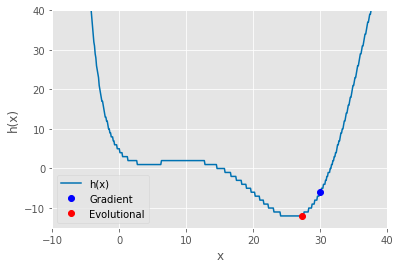

In [887]:
plt.axis([-10,40,-15,40])
plt.ylabel('h(x)')
plt.xlabel('x')
plt.plot(x,h(x),local_opt.x,local_opt.fun,'ob',global_opt.x,global_opt.fun,'or')
plt.legend(['h(x)','Gradient','Evolutional'])

###  Выводы: 
Градиентный метод некорректно применять к негладким функциям в отличии от метода дифференциальной эволюции. Но так же стоит заметить что последний работает медленней, за счет большого кол-ва вычеслений фукции в точке.